In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score, classification_report

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

In [4]:
from keras.activations import relu, sigmoid, softmax
from keras.losses import categorical_crossentropy

In [5]:
from keras.datasets import cifar10

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
X_train.shape

(50000, 32, 32, 3)

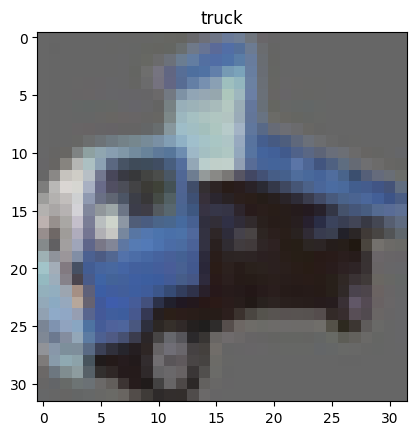

In [9]:
img_index = 12456
plt.imshow(X_train[img_index],)
object = y_train[img_index][0]
object = labels[object]
plt.title(object)
plt.show()

In [10]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(32, 32, 3), filters=5, kernel_size=(3, 3), activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPool2D())

cnn.add(Conv2D(filters=10, kernel_size=(3, 3), activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPool2D())

cnn.add(Conv2D(filters=20, kernel_size=(3, 3), activation='relu'))
cnn.add(Dropout(0.2))
# cnn.add(MaxPool2D())

cnn.add(Conv2D(filters=40, kernel_size=(3, 3), activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPool2D())


cnn.add(Flatten())

cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dense(units=10, activation='softmax', ))

cnn.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer=Adam(learning_rate=0.001))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 5)         140       
                                                                 
 dropout (Dropout)           (None, 30, 30, 5)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 5)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 10)        460       
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 10)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 10)         0         
 2D)                                                    

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
from keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train)

In [14]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [15]:
es = EarlyStopping(monitor='val_loss', patience=5)

checkpoint = ModelCheckpoint(filepath='cnn_checkpoint.h5',
                            save_best_only=True,
                            save_weights_only=False)

In [16]:
cnn.fit(X_train, y_train, epochs=100,
        callbacks=[es, checkpoint],
        validation_split=0.15,
        use_multiprocessing=True)

Epoch 1/100
1329/1329 [==============================] - 18s 13ms/step - loss: 1.8603 - acc: 0.3117 - val_loss: 1.7258 - val_acc: 0.3924
Epoch 2/100
1329/1329 [==============================] - 17s 13ms/step - loss: 1.5852 - acc: 0.4221 - val_loss: 1.6758 - val_acc: 0.3972
Epoch 3/100
1329/1329 [==============================] - 16s 12ms/step - loss: 1.5039 - acc: 0.4515 - val_loss: 1.5991 - val_acc: 0.4359
Epoch 4/100
1329/1329 [==============================] - 16s 12ms/step - loss: 1.4472 - acc: 0.4709 - val_loss: 1.5271 - val_acc: 0.4707
Epoch 5/100
1329/1329 [==============================] - 15s 11ms/step - loss: 1.4206 - acc: 0.4827 - val_loss: 1.6309 - val_acc: 0.4149
Epoch 6/100
1329/1329 [==============================] - 16s 12ms/step - loss: 1.3900 - acc: 0.4942 - val_loss: 1.5074 - val_acc: 0.4552
Epoch 7/100
1329/1329 [==============================] - 16s 12ms/step - loss: 1.3685 - acc: 0.5056 - val_loss: 1.5425 - val_acc: 0.4675
Epoch 8/100
1329/1329 [==================

In [17]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [18]:
y_pred_class = y_pred.argmax(axis=1)

In [19]:
y_pred_class[:5]

array([6, 8, 8, 8, 4], dtype=int64)

In [20]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.78      0.29      0.43      1000
           1       0.86      0.46      0.60      1000
           2       0.40      0.44      0.42      1000
           3       0.31      0.37      0.34      1000
           4       0.27      0.84      0.41      1000
           5       0.58      0.25      0.35      1000
           6       0.54      0.58      0.56      1000
           7       0.80      0.34      0.48      1000
           8       0.56      0.74      0.63      1000
           9       0.82      0.37      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.59      0.47      0.47     10000
weighted avg       0.59      0.47      0.47     10000



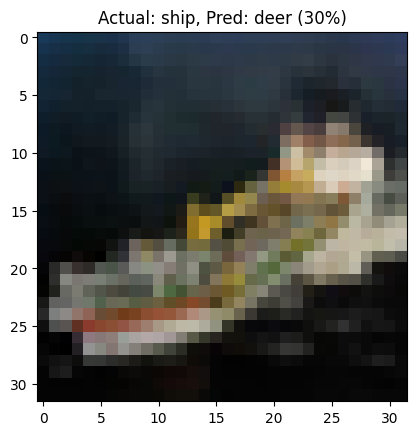

In [27]:
img_index = 6556

object = y_test[img_index][0]
object = labels[object]

pred_obj = y_pred_class[img_index]
pred_obj = labels[pred_obj]

pred_proba = y_pred[img_index].max()
pred_proba = int(pred_proba * 100)

plt.imshow(X_test[img_index],)
plt.title(f'Actual: {object}, Pred: {pred_obj} ({pred_proba}%)')
plt.show()